In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

size = 14
legendsize = 12

In [2]:
import math
def orderOfMagnitude(number):
    return math.floor(math.log(number, 10))

# MaxCut

In [3]:
df = pd.read_csv('../../res_qaoa.csv', sep=',')
df['num_qubits'] = df['num_qubits'].astype(int)
df

,num_qubits,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits
0,5,0.3,0.101593,0.023412,0.020406,0.029661,0.001274,27,12,12,12,21,1
1,5,0.3,0.046563,0.051755,0.187657,0.154216,0.008151,51,41,41,41,76,1000
2,5,0.7,0.077198,0.046142,0.038020,0.068754,0.000008,39,33,33,33,33,1
3,5,0.7,0.075026,0.039537,0.035897,0.258350,0.002888,108,84,84,84,94,1000
4,10,0.3,0.112183,0.416470,1.267485,1.661550,0.002110,90,30,30,30,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,95,0.7,34.961067,4.178266,9.803022,73.057018,0.357467,128145,70666,67671,64039,61208,1000
76,100,0.3,0.133621,0.771956,73.356441,382.962219,0.036504,372,156,156,156,176,1
77,100,0.3,24.799653,2.869301,6.920234,40.153097,1.242339,78132,48047,46760,46398,61929,1000
78,100,0.7,0.429921,7.648612,795.269384,4800.518984,0.014917,1335,420,420,420,420,1


In [4]:
def label_encoding (row):
    if row['considered_following_qubits'] == 1 :
        return 'Only Direct Neighbor'
    elif row['considered_following_qubits'] == 1000 :
        return "All Neighbors"
df["Encoding Prediction"] = df.apply(lambda row: label_encoding(row), axis=1)

## Graph

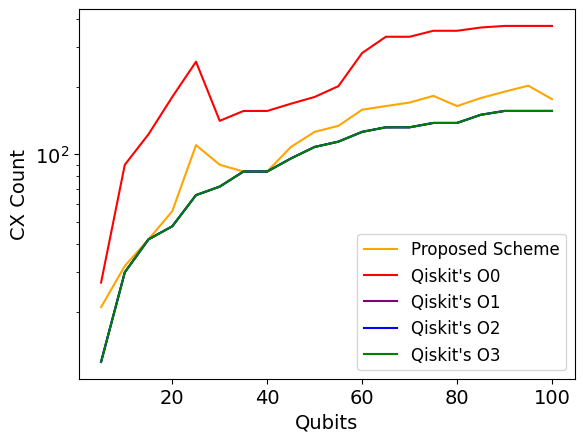

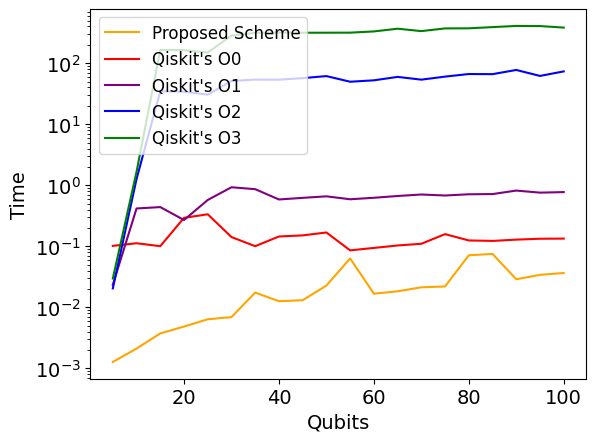

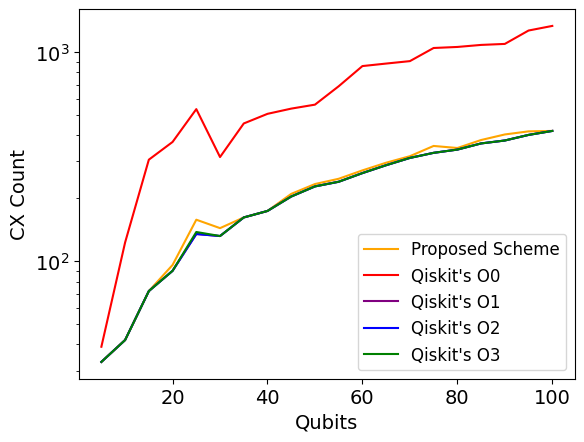

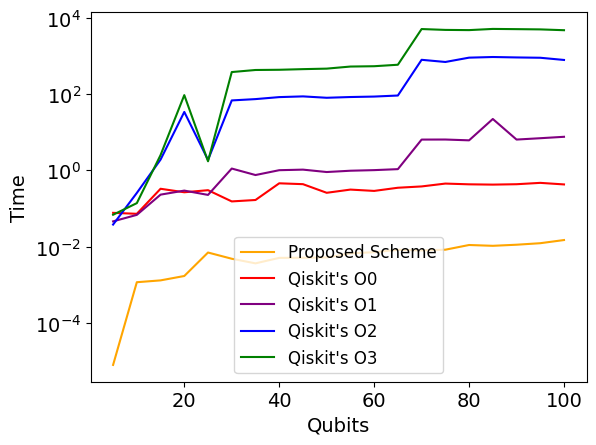

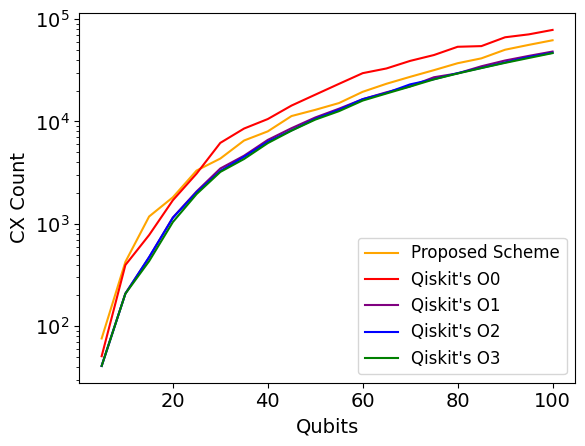

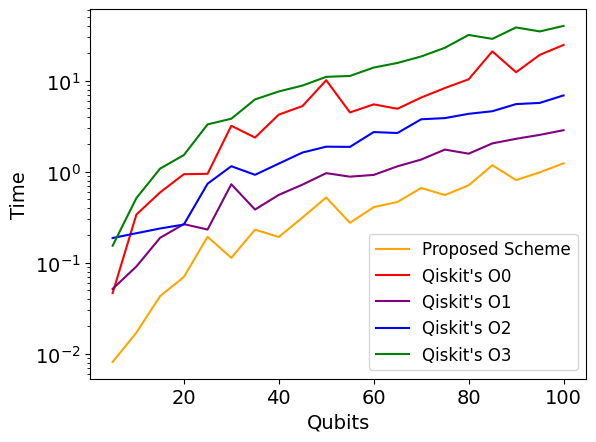

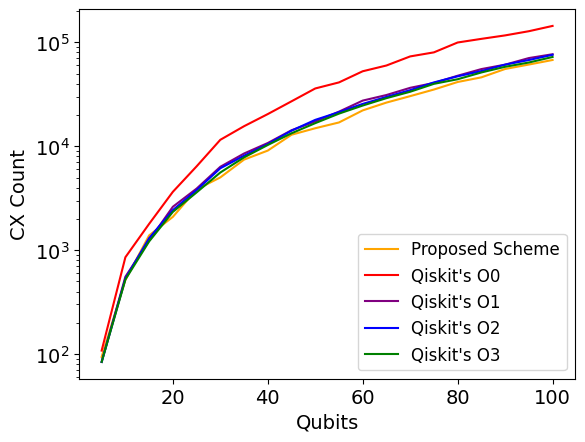

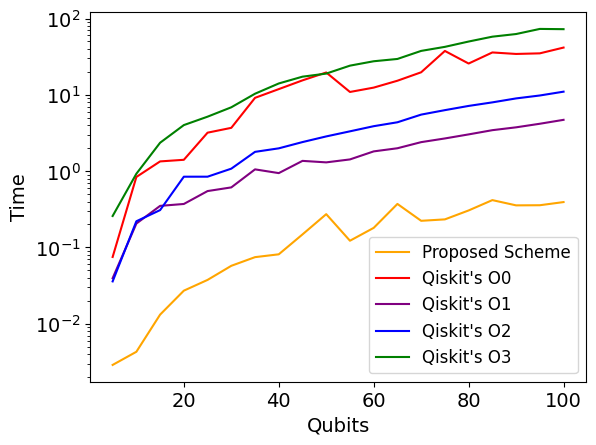

In [5]:
for considered_following_qubits in ["Only Direct Neighbor", "All Neighbors"]:
    for sample_probability in [0.3,0.7]:
        df_subset = df[(df.sample_probability==sample_probability) & (df["Encoding Prediction"]==considered_following_qubits)]
        
        ax1 = df_subset.plot(x='num_qubits', y='cx_count_proposed', color='orange', label="Proposed Scheme")   
        ax1.tick_params(which='both', labelsize=size)
        df_subset.plot(x='num_qubits', y='cx_count_baseline_O0', color='red', ax=ax1, label="Qiskit's O0")
        df_subset.plot(x='num_qubits', y='cx_count_baseline_O1', color='purple', ax=ax1, label="Qiskit's O1") 
        df_subset.plot(x='num_qubits', y='cx_count_baseline_O2', color='blue', ax=ax1, label="Qiskit's O2") 
        df_subset.plot(x='num_qubits', y='cx_count_baseline_O3', color='green', ax=ax1, label="Qiskit's O3") 
        
        plt.xlabel("Qubits", size=size)
        plt.ylabel("CX Count", size=size)
        plt.yscale("log")
        plt.legend(fontsize=legendsize)
        plt.savefig('cx_'+str(considered_following_qubits) + '_'+ str(sample_probability)+'.pdf')
        plt.show()
        
        ax2 = df_subset.plot(x='num_qubits', y='time_proposed', color='orange', label="Proposed Scheme")   
        ax2.tick_params(which='both', labelsize=size)
        df_subset.plot(x='num_qubits', y='time_baseline_O0', color='red', ax=ax2, label="Qiskit's O0")
        df_subset.plot(x='num_qubits', y='time_baseline_O1', color='purple', ax=ax2, label="Qiskit's O1") 
        df_subset.plot(x='num_qubits', y='time_baseline_O2', color='blue', ax=ax2, label="Qiskit's O2") 
        df_subset.plot(x='num_qubits', y='time_baseline_O3', color='green', ax=ax2, label="Qiskit's O3") 
        
        plt.xlabel("Qubits", size=size)
        plt.ylabel("Time", size=size)
        plt.yscale("log")
        plt.legend(fontsize=legendsize)
        plt.savefig('time_'+str(considered_following_qubits) + '_'+ str(sample_probability)+'.pdf')
        plt.show()

## Averages

In [6]:
df["time_ratio_O3"] = df["time_proposed"]/df["time_baseline_O3"]
df["order_magnitudes_diff"] = df["time_ratio_O3"].apply(orderOfMagnitude)
df["order_magnitudes_diff"].describe()

count    80.000000
mean     -3.637500
std       1.425303
min      -6.000000
25%      -5.000000
50%      -3.000000
75%      -2.000000
max      -2.000000
Name: order_magnitudes_diff, dtype: float64

In [7]:
df["cx_ratio_O3"] = df['cx_count_baseline_O3']/df['cx_count_proposed']
1-df.cx_ratio_O3.describe()["mean"]

0.10682352530598638

# Satellite

In [8]:
df = pd.read_csv('../../res_satellite.csv', sep=',')
df['num_qubits'] = df['num_qubits'].astype(int)
df

,num_qubits,sample_probability,time_baseline_O0,time_baseline_O1,time_baseline_O2,time_baseline_O3,time_proposed,cx_count_baseline_O0,cx_count_baseline_O1,cx_count_baseline_O2,cx_count_baseline_O3,cx_count_proposed,considered_following_qubits
0,5,0.4,0.264950,0.035677,0.138241,0.129103,0.066493,33,18,18,18,27,1
1,10,0.4,0.175643,1.052084,3.094081,2.824159,0.033471,117,36,36,36,36,1
2,15,0.4,0.247103,1.047812,56.174810,64.649561,0.070895,177,54,54,54,54,1
3,20,0.4,0.303368,1.167513,58.685788,310.369844,0.095531,219,60,60,60,66,1
4,25,0.4,0.554233,1.065296,47.864203,259.343637,0.064242,306,84,84,84,137,1
5,30,0.4,0.304713,1.184483,93.106109,488.457007,0.069009,183,90,90,90,108,1
6,35,0.4,0.290855,1.263609,105.169086,552.387644,0.133774,225,108,108,108,108,1
7,40,0.4,0.263569,1.309734,97.872650,524.467128,0.122488,225,108,108,108,108,1
8,45,0.4,0.349853,1.539660,106.662884,524.513971,0.278962,243,126,126,126,138,1
9,50,0.4,0.321624,1.459769,122.717601,519.957361,0.297749,261,144,144,144,162,1


## Graphs

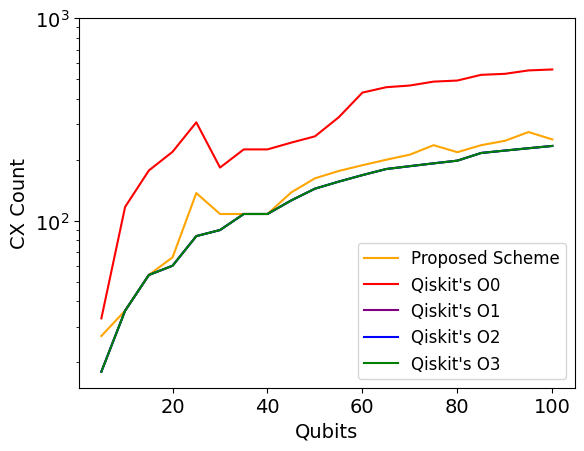

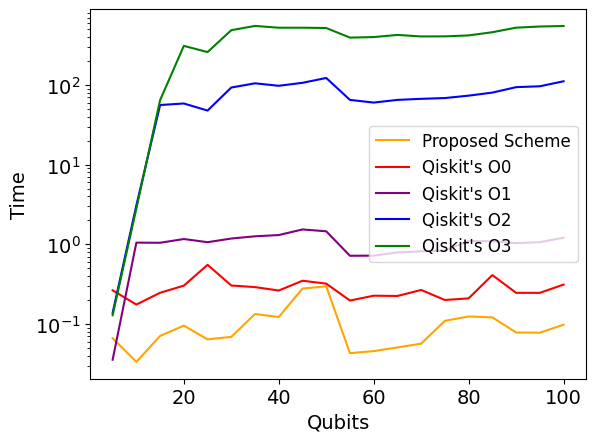

In [9]:
df_subset = df[(df.sample_probability==0.4) & (df.considered_following_qubits==1)]

ax1 = df_subset.plot(x='num_qubits', y='cx_count_proposed', color='orange', label="Proposed Scheme")   
ax1.tick_params(which='both', labelsize=size)
df_subset.plot(x='num_qubits', y='cx_count_baseline_O0', color='red', ax=ax1, label="Qiskit's O0")
df_subset.plot(x='num_qubits', y='cx_count_baseline_O1', color='purple', ax=ax1, label="Qiskit's O1") 
df_subset.plot(x='num_qubits', y='cx_count_baseline_O2', color='blue', ax=ax1, label="Qiskit's O2") 
df_subset.plot(x='num_qubits', y='cx_count_baseline_O3', color='green', ax=ax1, label="Qiskit's O3") 

plt.ylim(10e0*1.5, 10e2)
plt.xlabel("Qubits", size=size)
plt.ylabel("CX Count", size=size)
plt.yscale("log")
plt.legend(fontsize=legendsize)
plt.savefig('sat_cx_'+ str(sample_probability)+'.pdf')
plt.show()

ax2 = df_subset.plot(x='num_qubits', y='time_proposed', color='orange', label="Proposed Scheme")   
ax2.tick_params(which='both', labelsize=size)
df_subset.plot(x='num_qubits', y='time_baseline_O0', color='red', ax=ax2, label="Qiskit's O0")
df_subset.plot(x='num_qubits', y='time_baseline_O1', color='purple', ax=ax2, label="Qiskit's O1") 
df_subset.plot(x='num_qubits', y='time_baseline_O2', color='blue', ax=ax2, label="Qiskit's O2") 
df_subset.plot(x='num_qubits', y='time_baseline_O3', color='green', ax=ax2, label="Qiskit's O3") 

plt.xlabel("Qubits", size=size)
plt.ylabel("Time", size=size)

plt.yscale("log")
plt.legend(fontsize=legendsize, loc="center right")
plt.savefig('sat_time_' + str(sample_probability)+'.pdf')
plt.show()

## Averages

In [10]:
df["time_ratio_O3"] = df["time_baseline_O3"]/df["time_proposed"]
df["order_magnitudes_diff"] = df["time_ratio_O3"].apply(orderOfMagnitude)
df["order_magnitudes_diff"].describe()

count    20.000000
mean      2.700000
std       0.801315
min       0.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       3.000000
Name: order_magnitudes_diff, dtype: float64

In [11]:
df["cx_ratio_O3"] = df["cx_count_baseline_O3"]/df["cx_count_proposed"]
1-df.cx_ratio_O3.describe()["mean"]

0.11627894710752606